# Plotting Phase fraction vs T

## Libraries

In [78]:
from pycalphad import Database, equilibrium, variables as v
import matplotlib.pyplot as plt
import numpy as np
from pycalphad.plot.utils import phase_legend

### Defining file paths for database

In [79]:
dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'

### Load database

In [80]:
# dbf = Database(dbf_diretory + 'COST507_Sundman.tdb') #Aluminum database
# dbf = Database(dbf_diretory + 'COST507_Original.tdb') #Aluminum database
# dbf = Database(dbf_diretory + 'mc_al_v2.032.pycalphad.tdb') #Aluminum database
# dbf = Database(dbf_diretory + 'mc_al_v2.032.pycalphad_with_ZR_COST507_Sund.tdb') #Combined for Zr and Sc
dbf = Database(dbf_diretory + 'COST507_Sundman_w_Sc-test.tdb') #Aluminum database addition of Sc (GOOD)


### Determine phases

In [81]:
#phases = ['LIQUID', 'FCC_A1', 'DIAMOND_A4'] #For Al-Si
#phases = ['LIQUID', 'FCC_A1', 'DIAMOND_A4'] #For Al-Si
# phases = ['LIQUID', 'FCC_A1', 'DIAMOND_A4', 'AL3M_DO22',] #For Al-Si

# phases = list(dbf.phases.keys())
# phases = ['LIQUID', 'FCC_A1', 'AL3ZR'] #For Al-ZR
# phases = ['LIQUID', 'FCC_A1', 'HCP_A3', 'BCC_A2', 'AL3SC', 'AL2SC', 'ALSC'] #For Al-Sc
# phases = ['LIQUID', 'FCC_A1', 'AL3ZR', 'HCP_A3', 'BCC_A2', 'AL3SC', 'AL2SC', 'ALSC'] #For Al-ZR-Sc
phases = ['LIQUID', 'FCC_A1', 'AL3ZR', 'AL3SC', 'AL4MN','AL6MN',] #For Al-ZR-SC-MN


print(phases)

['LIQUID', 'FCC_A1', 'AL3ZR', 'AL3SC', 'AL4MN', 'AL6MN']


In [83]:
# For specifying in terms of mass fractions; can also specify in mole fractions using v.X
# mass_fracs = {v.W('CR'): 18./100, v.W('NI'): 8.0/100}
# mass_fracs = {v.W('SI'): 10./100, v.W('MG'): 3/100}
# mass_fracs = {v.W('ZR'): 1.4/100} #Al-Zr
# mass_fracs = {v.W('ZR'): 2.0/100, v.W('SC'): 0.2/100} #AL-ZR-SC
mass_fracs = {v.W('ZR'): 2.0/100, v.W('SC'): 0.2/100, v.W('MN'): 4.0/100} #AL-ZR-SC

# mass_fracs = {v.W('SI'): 12.0/100, v.W('CU'): 4.2/100, v.W('FE'): 0.6/100, v.W('MG'): 0.3/100, v.W('MN'): 0.4/100, v.W('ZN'): 0.8/100, v.W('NI'): 0.01/100, v.W('TI'): 1./100}


conds = v.get_mole_fractions(mass_fracs, 'AL', dbf)

conds[v.T] = (663.15, 2000, 0.05) # Kelvin
conds[v.P] = 1e5 # Pa
conds[v.N] = 1
eq = equilibrium(dbf, ['ZR', 'SC','MN','AL','VA'], phases, conds)
# eq = equilibrium(dbf, ['SI', 'CU', 'FE', 'MG', 'MN', 'ZN', 'NI', 'TI', 'AL',  'VA'], phases, conds)

In [84]:
phases = sorted(set(eq.Phase.values.flatten()) - {''})
phase_handles, phasemap = phase_legend(phases)
print (phases)

[np.str_('AL3SC'), np.str_('AL3ZR'), np.str_('AL4MN'), np.str_('AL6MN'), np.str_('FCC_A1'), np.str_('LIQUID')]


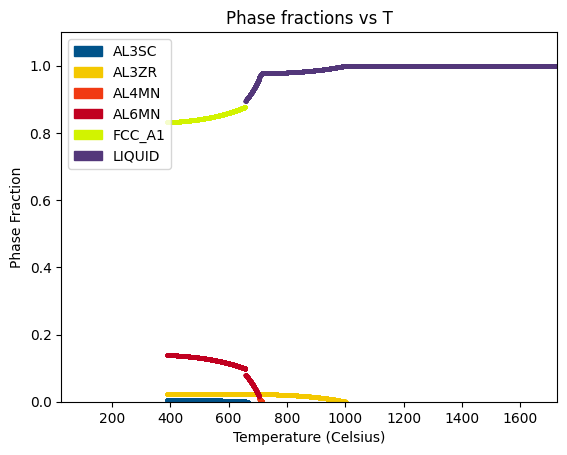

In [85]:
plt.gca().set_title('Phase fractions vs T')
plt.gca().set_xlabel('Temperature (Celsius)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((300-273.15, 2000-273.15))

for name in phases:
    plt.scatter(eq.T.broadcast_like(eq.NP)-273.15, eq.NP.where(eq.Phase == name), color=phasemap[name], s=3)
plt.gca().legend(phase_handles, phases, loc='upper left')